In [1]:
import sys
sys.path.append('../scripts/')
from robot import *

In [2]:
import random
class RandomRobot(Robot):
    
    def func_state_transition(self, nu, omega, time, pose):
        t0 = pose[2]
        nu = random.gauss(nu, nu*0.3)
 #       return pose + np.array([0.1,0.1,0.1])
        omega = random.gauss(omega, omega*0.3)
        if math.fabs(omega) < 1e-10:
            return pose + np.array( [nu*math.cos(t0), 
                                     nu*math.sin(t0),
                                     omega ] ) * time
        else:
            return pose + np.array( [nu/omega*(math.sin(t0 + omega*time) - math.sin(t0)), 
                                     nu/omega*(-math.cos(t0 + omega*time) + math.cos(t0)),
                                     omega*time ] )

<IPython.core.display.Javascript object>


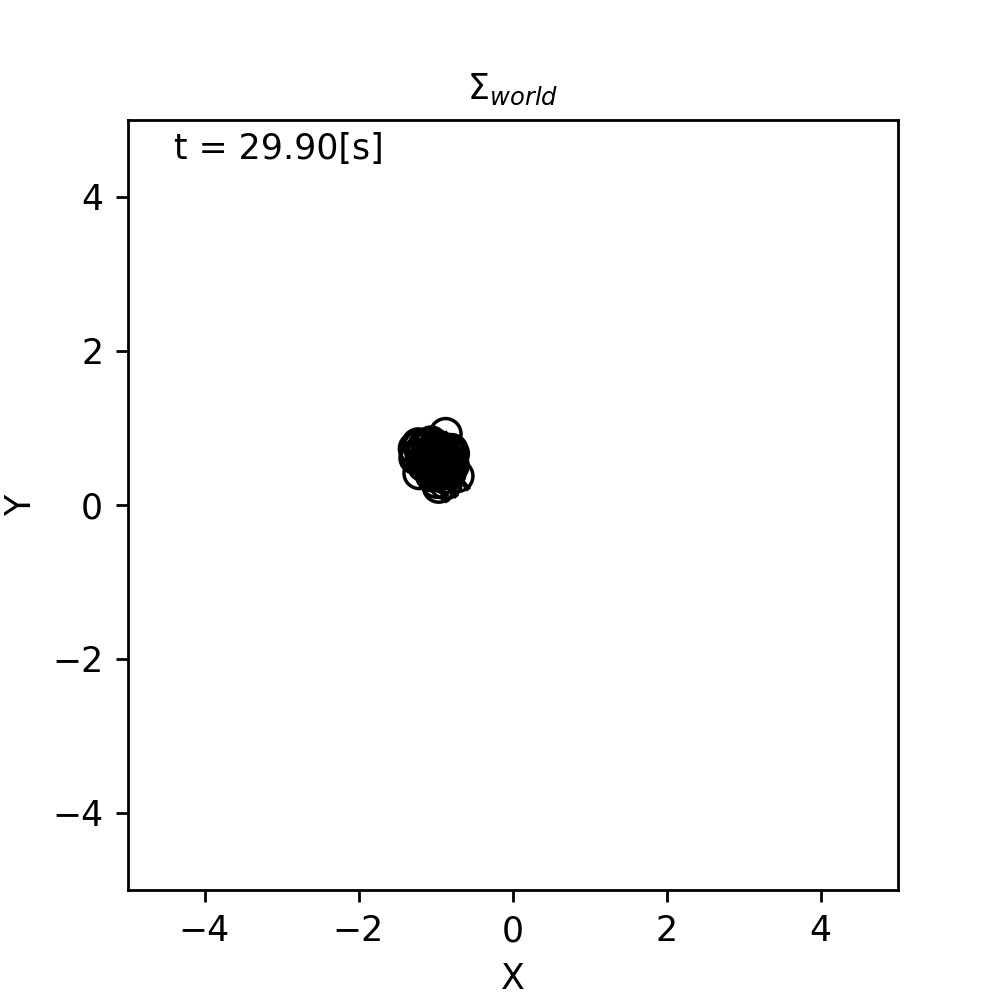

In [3]:
world = World(30, 0.1) 

for i in range(100):
    circling = Agent(0.2, 10.0/180*math.pi)
    r = RandomRobot( np.array([0, 0, 0]).T, sensor=None, agent=circling ) 
    world.append(r)

world.draw()